第二题

['dog' 'eating' 'flea' 'from' 'has' 'him' 'is' 'it' 'maybe' 'my' 'park'
 'prevent' 'problems' 'steak' 'stupid' 'take' 'to' 'try']
[[1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 2 0]
 [1 1 0 1 0 0 0 0 0 2 0 1 0 1 0 0 1 1]]


<Axes: >

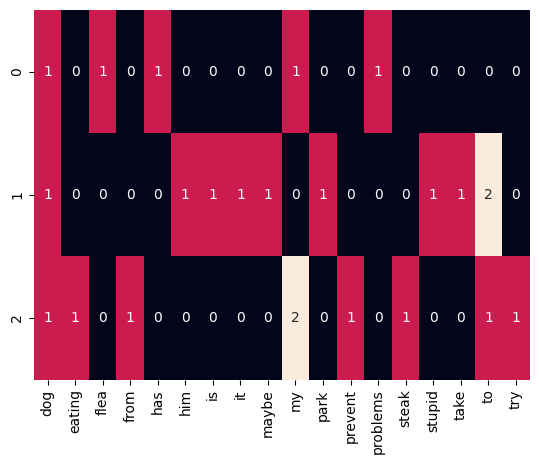

In [18]:
#导入特征数值计算类（支持传入停止词）
from sklearn.feature_extraction.text import CountVectorizer
#语料
corpus = [
          'My dog has a flea problems.',
          'Maybe it is stupid to take him to a dog park.',
          'Try to prevent my dog from eating my steak.'
]

# 实例化
vectorizer = CountVectorizer()
#生成词汇表
term_frequencies = vectorizer.fit_transform(corpus) 
vocab = vectorizer.get_feature_names_out()
print(vocab)

#输出词频矩阵
term_frequencies_matrix = term_frequencies.toarray()
print(term_frequencies_matrix )

#热力图展示
import seaborn as sns
sns.heatmap(term_frequencies_matrix, annot=True, cbar = False, xticklabels = vocab)




In [19]:
#尝试用词袋模型对新的语句进行向量化
res = vectorizer.transform(['My dog likes steak.']).toarray()
print(res)

[[1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]]


第三题：

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.datasets import fetch_20newsgroups  

# 加载数据集  
newsgroups_data = fetch_20newsgroups(subset='all')  
  
# 创建 TfidfVectorizer 对象  
vectorizer = TfidfVectorizer()  
  
# 对数据进行向量化  
tfidf_matrix = vectorizer.fit_transform(newsgroups_data.data)  
  
# 输出第一个文本的向量结果  
print(tfidf_matrix[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


第四题：

In [29]:
import time
t0=time.time()
print('程序开始的时间:',time.strftime('%H:%M:%S',time.localtime(time.time())))

import numpy as np
from sklearn.datasets import fetch_20newsgroups   #获取数据集
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF文本特征提取
#平时常用的一些分类方法
from sklearn.naive_bayes import MultinomialNB #朴素贝叶斯


#选取20个类中7种比较典型的类别进行实验
select = ['alt.atheism','comp.graphics','misc.forsale','rec.autos',
          'sci.crypt','soc.religion.christian','talk.politics.guns']
train=fetch_20newsgroups(subset='train',categories=select)
test=fetch_20newsgroups(subset='test',categories=select)

#train=fetch_20newsgroups(subset='train')
#test=fetch_20newsgroups(subset='test')

#将文章数据向量化（TF-IDF算法）
vectorizer = TfidfVectorizer() 
train_v=vectorizer.fit_transform(train.data)
test_v=vectorizer.transform(test.data)

Classifier = [MultinomialNB()]
Classifier_str = ['MultinomialNB()']
for i in Classifier_str:
    t2=time.time()
    model = eval(i)
    model.fit(train_v,train.target)
    print(i+"训练集的准确率为:",model.score(train_v,train.target))
    print(i+"测试集的准确率为:",model.score(test_v,test.target))
    print(i+'用时:%.6fs'%(time.time()-t2))
    #y_predict=model.predict(test_v)
    #print(np.mean(y_predict==test.target))
    
t1=time.time()
print('程序结束的时间:',time.strftime('%H:%M:%S',time.localtime(time.time())))
print("用时：%.2fs"%(t1-t0))   



程序开始的时间: 15:50:20
MultinomialNB()训练集的准确率为: 0.961335676625659
MultinomialNB()测试集的准确率为: 0.8714177978883861
MultinomialNB()用时:0.030578s
程序结束的时间: 15:50:21
用时：1.95s


第五题：
* 傅里叶变换:是一种分析信号的方法，它可分析信号的成分，也可用这些成分合成信号。在分析信号时，主要应用于处理平稳信号，通过傅里叶变换可以获取一段信号总体上包含哪些频率的成分，但是对各成分出现的时刻无法得知。  

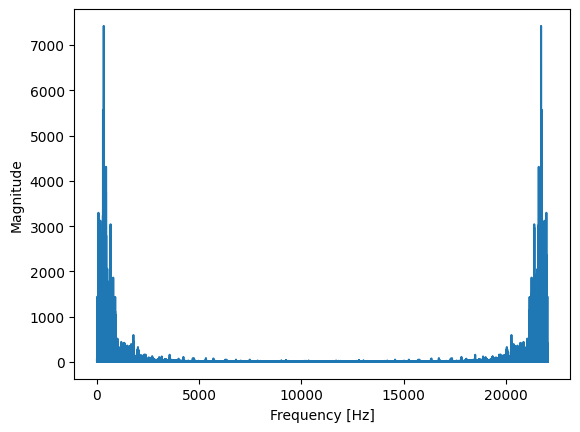

In [38]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy.fft  
  
# 读取音频文件  
audio_data, sample_rate = librosa.load('出水莲片段.wav') # 请替换为你的音频文件路径  
  
# 进行快速傅立叶变换  
fft_result = scipy.fft.fft(audio_data)  
np.log10(fft_result)
  
# 获取幅度谱  
amp_spec = np.abs(fft_result)  
  
# 获取频率轴  
freq_axis = np.linspace(0, sample_rate, len(amp_spec))  
  
# 可视化结果  
plt.plot(freq_axis, amp_spec)  
plt.xlabel('Frequency [Hz]')  
plt.ylabel('Magnitude')  
plt.show()

第八题

In [47]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid # 下载数据集使用
from torch_geometric.transforms import NormalizeFeatures


dataset = Planetoid(root='', name='Cora', transform=NormalizeFeatures()) # transform预处理
data = dataset[0]

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

model.eval()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

model.eval()

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)
Epoch: 001, Loss: 1.9463
Epoch: 002, Loss: 1.9409
Epoch: 003, Loss: 1.9343
Epoch: 004, Loss: 1.9275
Epoch: 005, Loss: 1.9181
Epoch: 006, Loss: 1.9086
Epoch: 007, Loss: 1.9015
Epoch: 008, Loss: 1.8933
Epoch: 009, Loss: 1.8808
Epoch: 010, Loss: 1.8685
Epoch: 011, Loss: 1.8598
Epoch: 012, Loss: 1.8482
Epoch: 013, Loss: 1.8290
Epoch: 014, Loss: 1.8233
Epoch: 015, Loss: 1.8057
Epoch: 016, Loss: 1.7966
Epoch: 017, Loss: 1.7825
Epoch: 018, Loss: 1.7617
Epoch: 019, Loss: 1.7491
Epoch: 020, Loss: 1.7310
Epoch: 021, Loss: 1.7147
Epoch: 022, Loss: 1.7056
Epoch: 023, Loss: 1.6954
Epoch: 024, Loss: 1.6697
Epoch: 025, Loss: 1.6538
Epoch: 026, Loss: 1.6312
Epoch: 027, Loss: 1.6161
Epoch: 028, Loss: 1.5899
Epoch: 029, Loss: 1.5711
Epoch: 030, Loss: 1.5576
Epoch: 031, Loss: 1.5393
Epoch: 032, Loss: 1.5137
Epoch: 033, Loss: 1.4948
Epoch: 034, Loss: 1.4913
Epoch: 035, Loss: 1.4698
Epoch: 036, Loss: 1.3998
Epoch: 037, Loss: 1.4041
Epoch: 038, L

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

第九题：

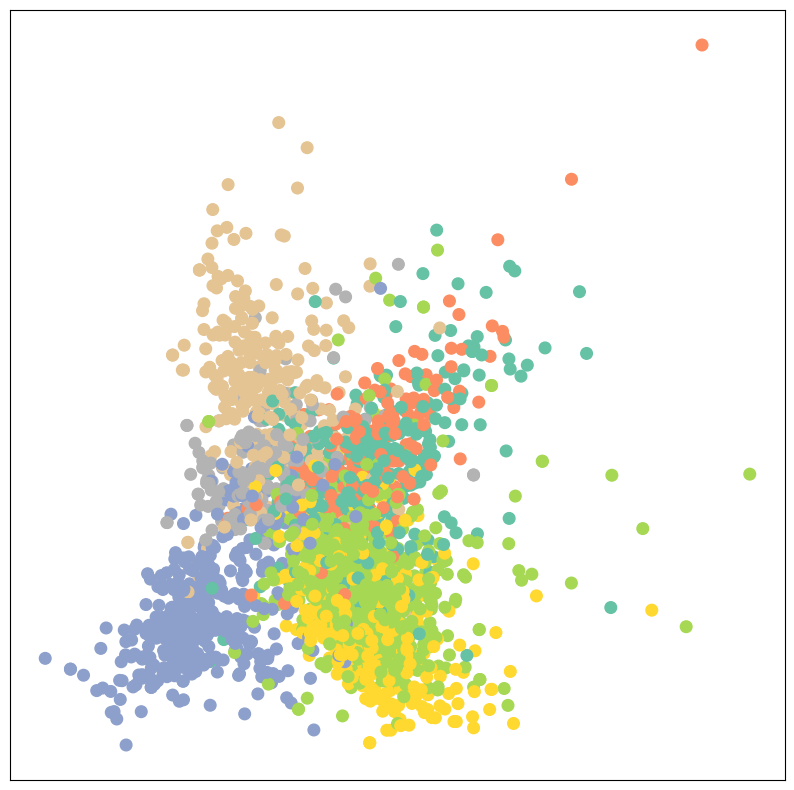

In [48]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize(h, color):
    z = PCA(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)